In [90]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
path = kagglehub.dataset_download("sijovm/used-cars-data-from-ebay-kleinanzeigen")
print(path)

C:\Users\Aluno\.cache\kagglehub\datasets\sijovm\used-cars-data-from-ebay-kleinanzeigen\versions\1


In [92]:
import os
os.listdir(path)

['autos.csv']

In [126]:
df = pd.read_csv(os.path.join(path, "autos.csv"), encoding="latin-1")
df = df[df["yearOfRegistration"].between(1970, 2023)]
df = df[df["price"].between(df["price"].quantile(0.01), df["price"].quantile(0.99))]
df.fillna({"vehicleType": "other", 'gearbox':'não especificado'}, inplace=True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,other,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [94]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

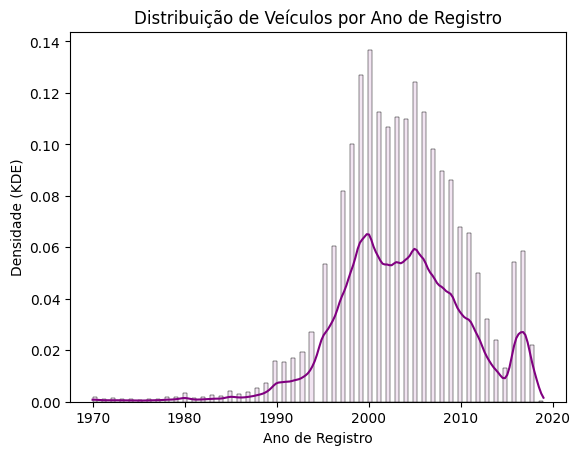

In [128]:
sns.histplot(df["yearOfRegistration"], kde=True, color="purple", bins=100, stat="density", alpha=0.1, edgecolor="black")
plt.title("Distribuição de Veículos por Ano de Registro")
plt.xlabel("Ano de Registro")
plt.ylabel("Densidade (KDE)")
plt.show()

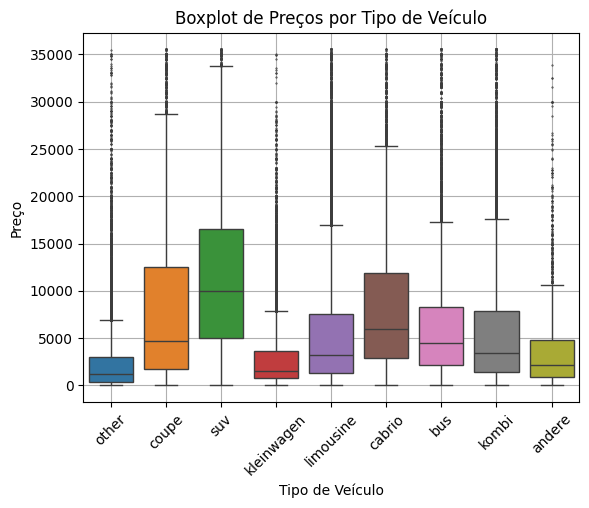

In [127]:
sns.boxplot(x="vehicleType", y="price", data=df, hue="vehicleType", legend=False, fliersize=0.5)
plt.grid()
plt.title("Boxplot de Preços por Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Preço")
plt.xticks(rotation=45)
plt.show()

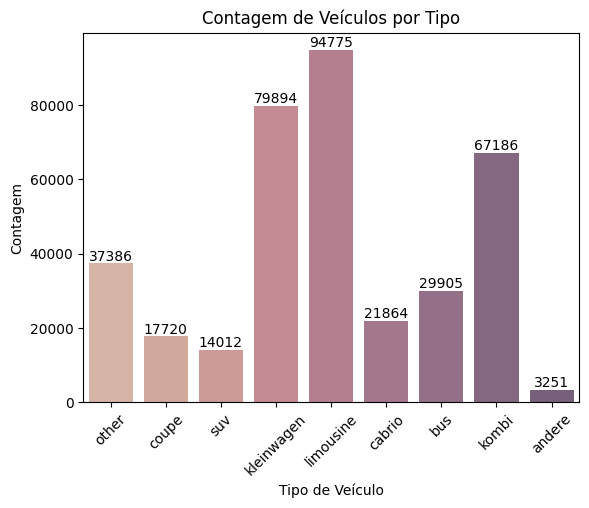

In [169]:
#Show value on top of the bars
ax = sns.countplot(x="vehicleType", data=df, palette='flare', hue="vehicleType", saturation=0.5, legend=False, alpha=0.8, ax=plt.gca())
for container in ax.containers:
    ax.bar_label(container)

plt.title("Contagem de Veículos por Tipo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

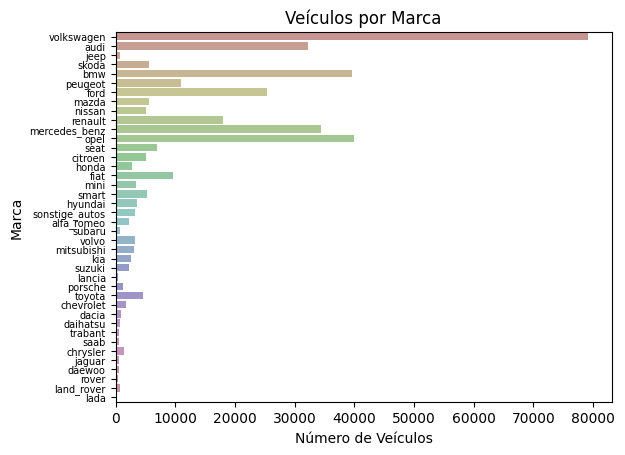

In [195]:
sns.countplot(y="brand", data=df, palette='hls', hue="brand", saturation=0.5, legend=False, alpha=0.8)
plt.title("Veículos por Marca")
plt.xlabel("Número de Veículos")
plt.ylabel("Marca")
plt.yticks(fontsize=7)
plt.show()


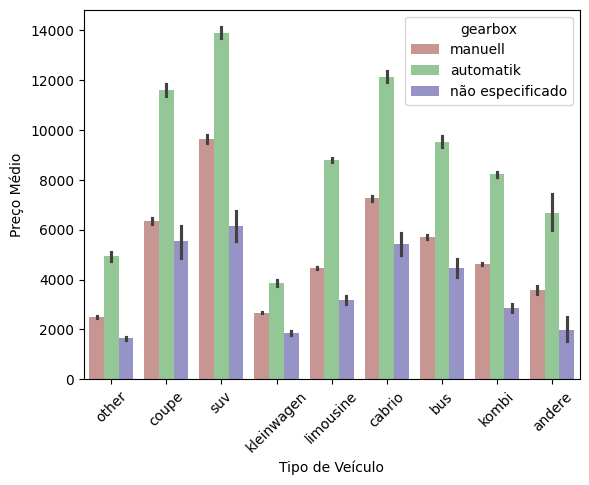

In [197]:
sns.barplot(x="vehicleType", y="price", data=df, hue="gearbox",palette='hls', estimator=lambda x: sum(x) / len(x), saturation=0.5, legend=True, alpha=0.8)
plt.xlabel("Tipo de Veículo")
plt.ylabel("Preço Médio")
plt.xticks(rotation=45)
plt.legend(title="gearbox")
plt.show()

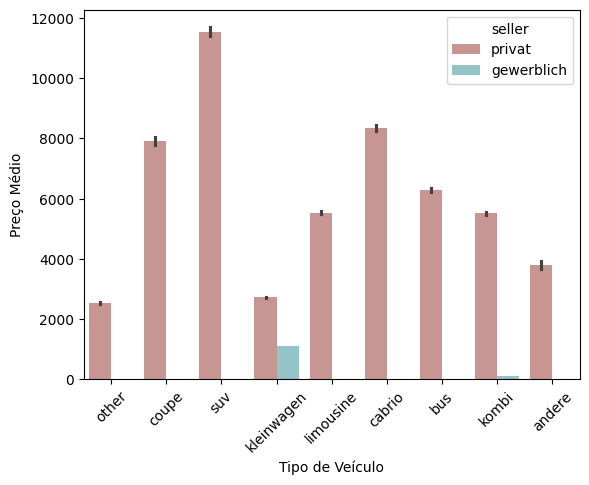

In [193]:
sns.barplot(x="vehicleType", y="price", data=df, hue="seller", estimator=lambda x: sum(x) / len(x), palette='hls', saturation=0.5, legend=True, alpha=0.8)
plt.xlabel("Tipo de Veículo")
plt.ylabel("Preço Médio")
plt.xticks(rotation=45)
plt.legend(title="seller")
plt.show()

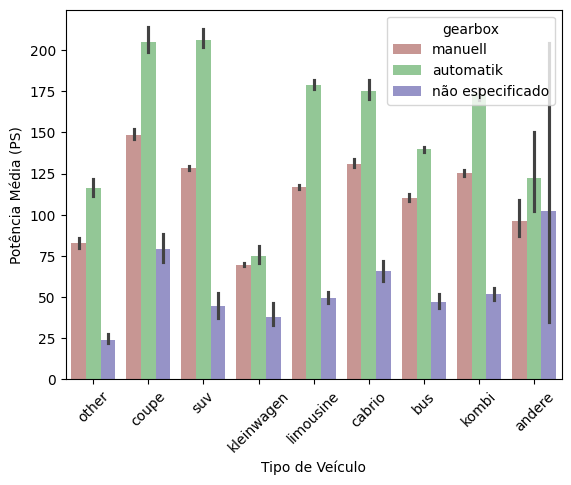

In [194]:
sns.barplot(x="vehicleType", y="powerPS", data=df, hue="gearbox", estimator=lambda x: sum(x) / len(x), palette='hls', saturation=0.5, legend=True, alpha=0.8)
plt.xlabel("Tipo de Veículo")
plt.ylabel("Potência Média (PS)")
plt.xticks(rotation=45)
plt.legend(title="gearbox")
plt.show()

In [206]:
table = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()
table.columns = ['Marca', 'Tipo de Veículo', 'Preço Médio']
table


,Marca,Tipo de Veículo,Preço Médio
0,alfa_romeo,andere,1961.538462
1,alfa_romeo,cabrio,7844.550802
2,alfa_romeo,coupe,5596.656652
3,alfa_romeo,kleinwagen,4466.242678
4,alfa_romeo,kombi,3580.161926
...,...,...,...
331,volvo,kleinwagen,3912.714286
332,volvo,kombi,3536.405768
333,volvo,limousine,4965.383648
334,volvo,other,2730.034826


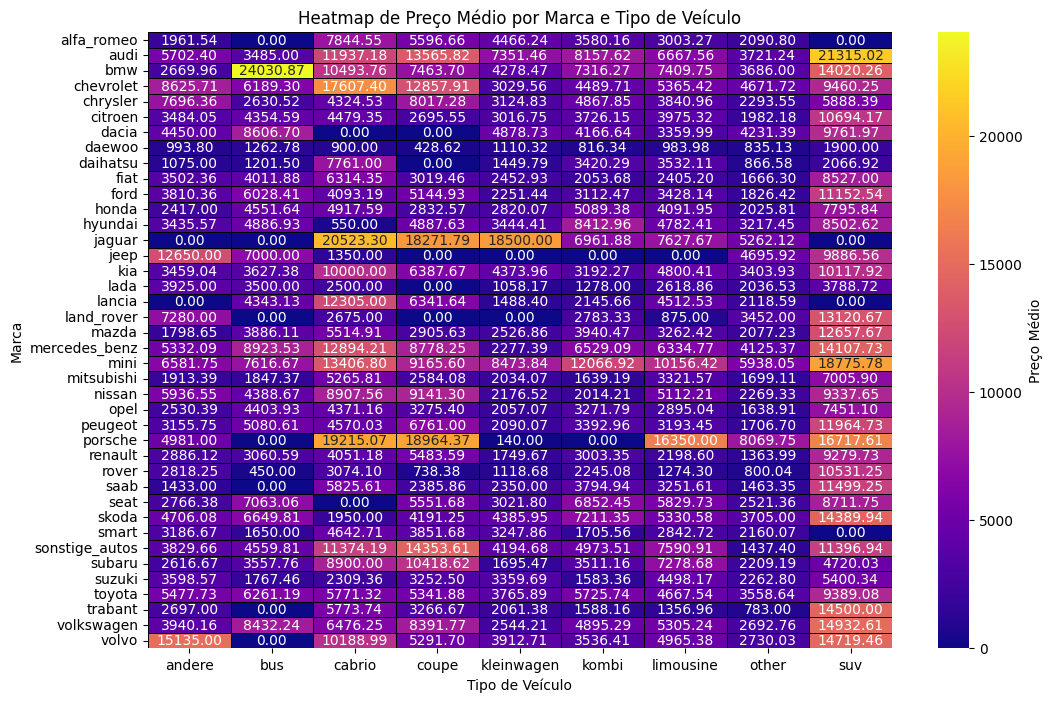

In [ ]:
df_pivot = df.pivot_table(
    index="brand", 
    columns="vehicleType", 
    values="price", 
    aggfunc="mean", 
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="plasma", cbar_kws={'label': 'Preço Médio'}, linewidths=0.5, linecolor='black')
plt.title("Heatmap de Preço Médio por Marca e Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Marca")
plt.show()